In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sn

from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Target

Need to perform clustering to summarize customer segments.

Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

# Dataset Description
## People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's 
household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

## Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month


Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

# Mounting the Drive and importing the Dataset

In [ ]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Practice - Amr Kandil - 900181344/Masters Week/Datasets/marketing_campaign.csv')

# EDA

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

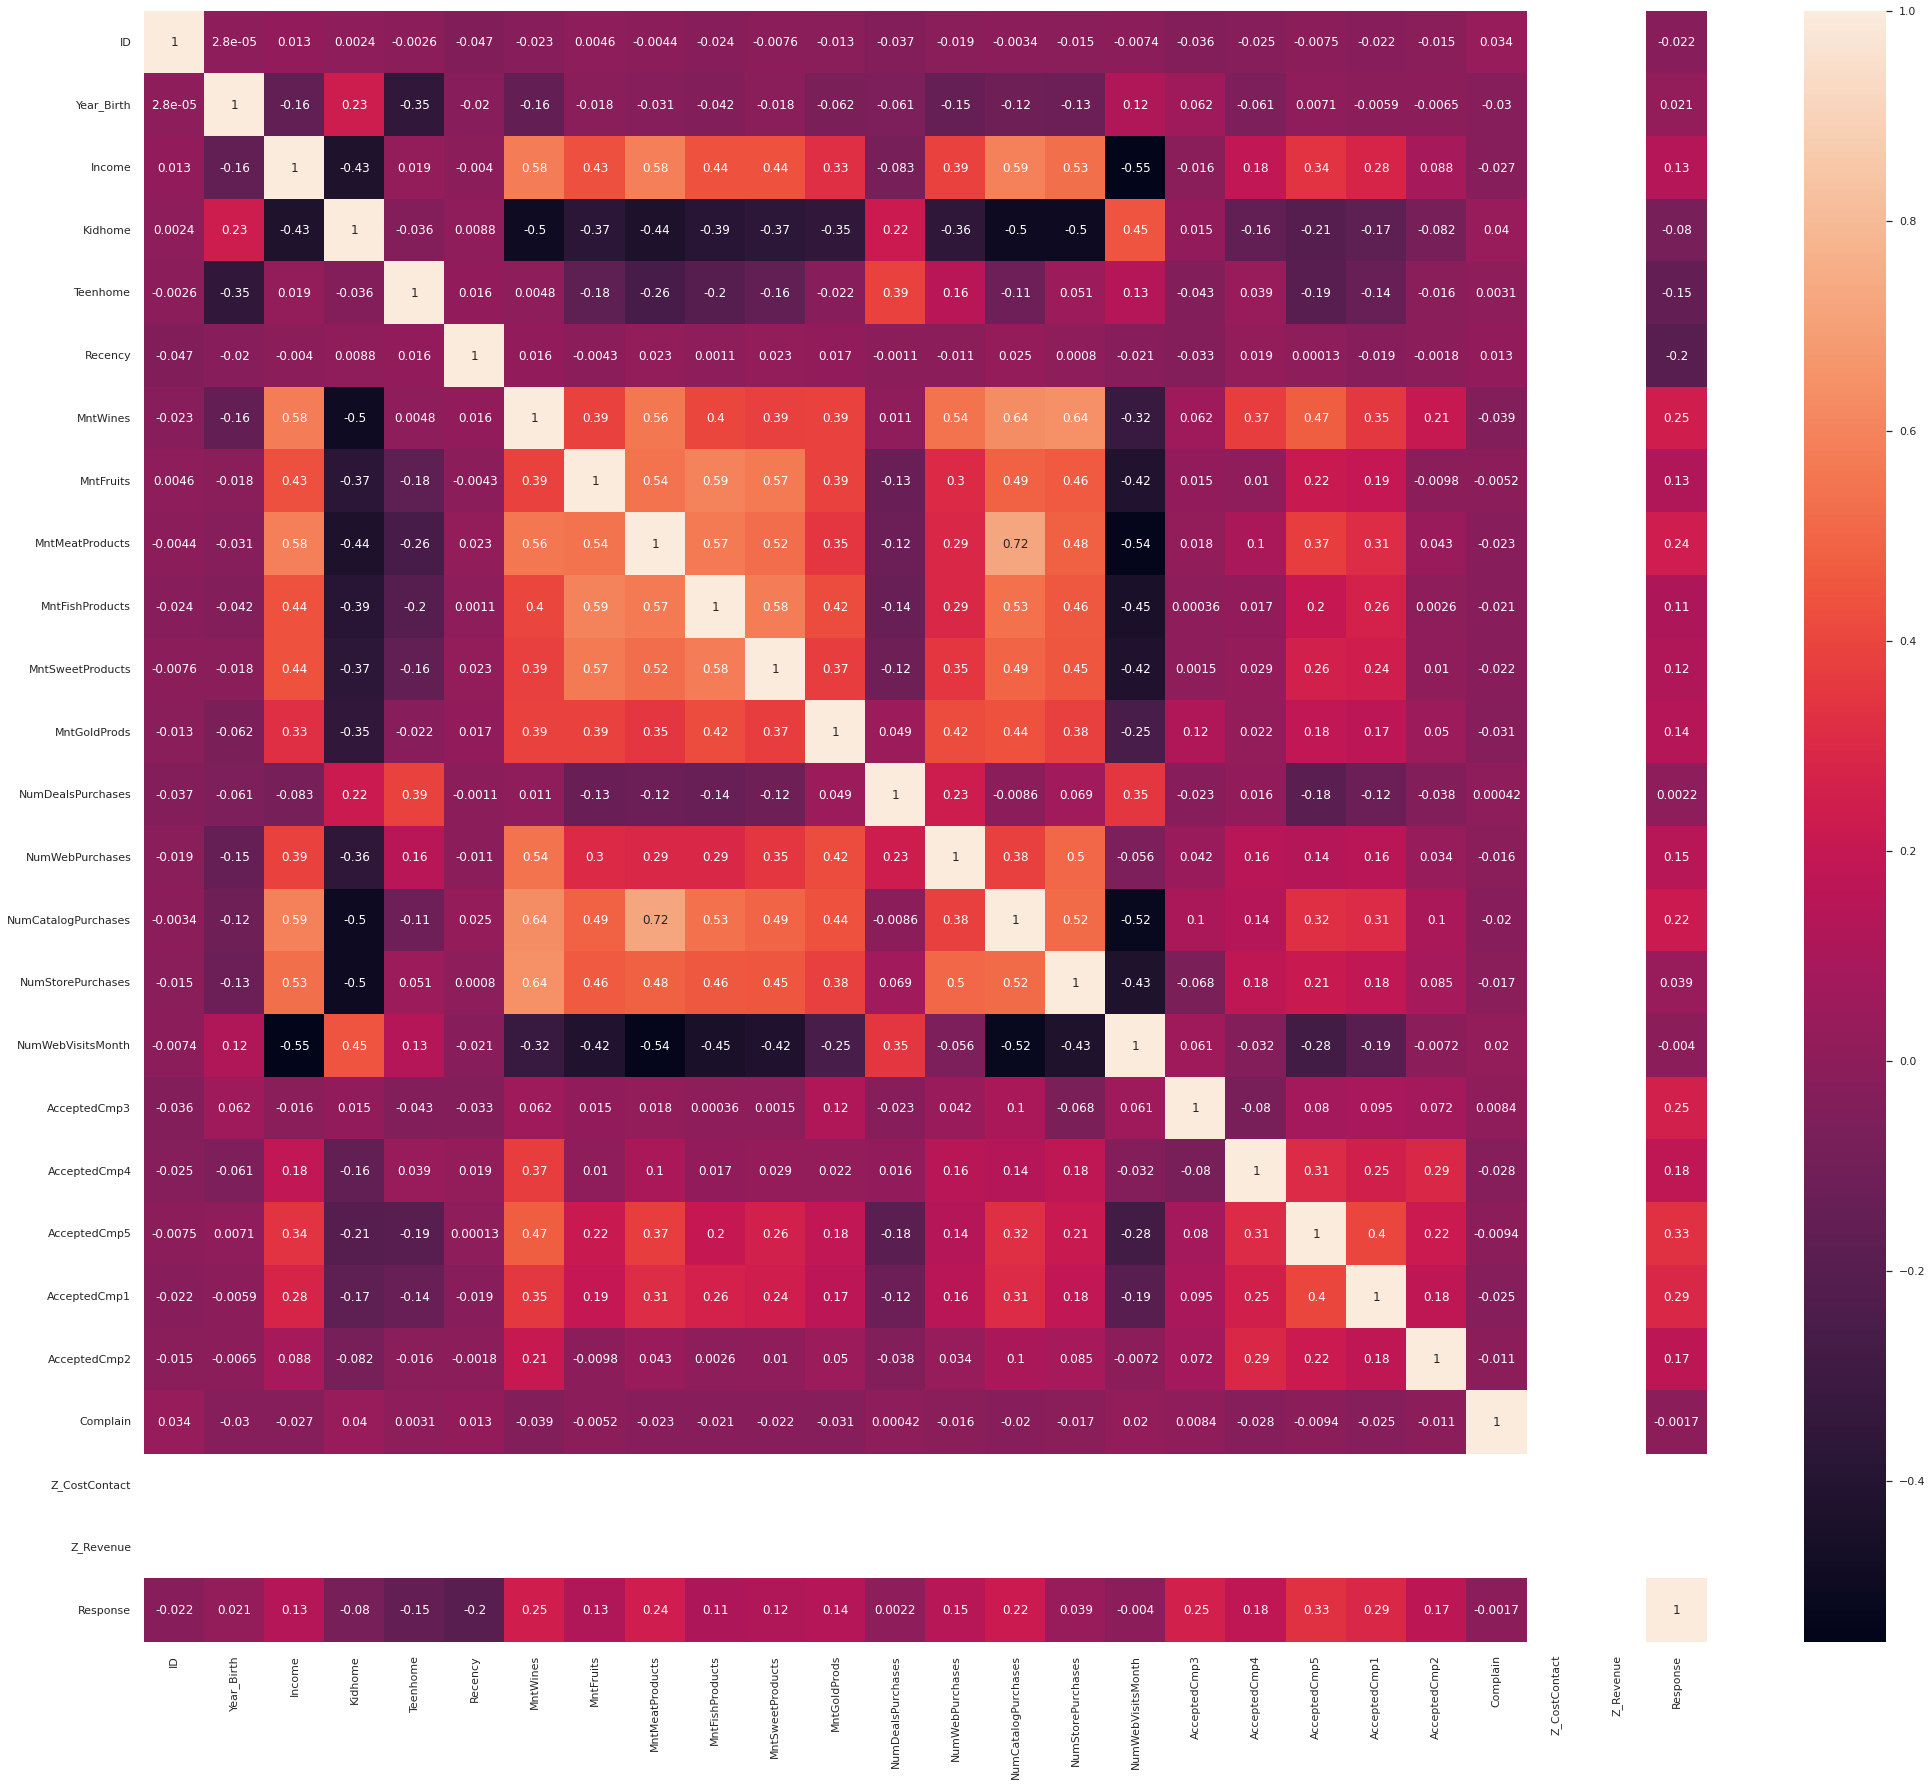

In [ ]:
fig = plt.figure(figsize=(35,30))
sn.set(style = "whitegrid")
correlation = df.corr()
# k = 26
# cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
sn.heatmap(correlation, annot=True)

# Data Cleaning

## Null Values

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing/len(df))*100
missing_percent.head(5)

Income               1.071429
ID                   0.000000
NumDealsPurchases    0.000000
Z_Revenue            0.000000
Z_CostContact        0.000000
dtype: float64

In [ ]:
df["Income"].fillna(df["Income"].mean(), inplace=True)

## Duplicates

In [ ]:
duplicates = df.duplicated().sum()
print("Number of Duplicates = ", duplicates)

Number of Duplicates =  0


## Mixed Data

In [ ]:
numeric_feats = df.select_dtypes(include='number')
numeric_feats

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
categorical = df.select_dtypes(include='object')
categorical.head(5)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


# Feature Engineering

* Replace "Dt_Customer" with a new feature called "loyalty_days", which indicates the number of days since the first purchase.

* Replace "Year_Birth" feature by "Age" feature which is calculated by subtracting the year of birth from the current year.

* Add all amounts spent by the customer into one new feature called "Total_Purchases" indicating the total amount spent by the customer in various categories over the span of two years.

* Add the kids and teenagers features into a new feature called "Total_Children" to indicate total children in a household.

* Create three categories in the "Education" by simplifying its value counts.

* Rename some of the features for extra clarity.

* Drop some of the redundant features like "ID" and others.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [ ]:
df['Dt_Customer'].head(5)

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
#Created a feature "loyalty_days"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)
# df["loyalty_days"] = days
# df["loyalty_days"] = pd.to_numeric(df["loyalty_days"], errors="coerce")

In [ ]:
# df['loyalty_days'].head(5)

In [ ]:
# Create Age feature
df["Age"] = 2022-df["Year_Birth"]

# Create Total Purchases feature
df["Total_Purchases"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Create Total Children feature 
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

# Create Total Offers Taken as a percentage of all offers  
df["Total_Offers_Taken"]=(df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"])/6

# Rename features for clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
df = df.drop(["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [ ]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

We felt that some values are redundant and when we googled the 2n cycle for example we discovered its the same as Post Graduate
  * First cycle is for the most part equivalent to what is known as the undergraduate level, or bachelor's level of studies. Second cycle corresponds to graduate level or master's level studies. Third cycle corresponds to doctoral or PhD level studies. Different types of qualifications can be offered at all three cycles.

In [ ]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                                         "2n Cycle":"Postgraduate", 
                                         "Graduation":"Graduate", 
                                         "Master":"Postgraduate", 
                                         "PhD":"Postgraduate"})
df["Education"].unique()


array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [ ]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
categorical = df.select_dtypes(include='object')
categorical.head(5)

,Education,Marital_Status
0,Graduate,Single
1,Graduate,Single
2,Graduate,Together
3,Graduate,Together
4,Postgraduate,Married


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   Wines                2240 non-null   int64  
 7   Fruits               2240 non-null   int64  
 8   Meat                 2240 non-null   int64  
 9   Fish                 2240 non-null   int64  
 10  Sweets               2240 non-null   int64  
 11  Gold                 2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [ ]:
numeric_feats = df.select_dtypes(include='number')
numeric_feats

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Purchases,Total_Children,Total_Offers_Taken
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,65,1617,0,0.166667
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,68,27,2,0.000000
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,57,776,0,0.000000
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,38,53,1,0.000000
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,41,422,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,0,55,1341,1,0.000000
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,0,0,0,76,444,3,0.166667
2237,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,0,0,0,41,1241,0,0.166667
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,0,0,66,843,1,0.000000


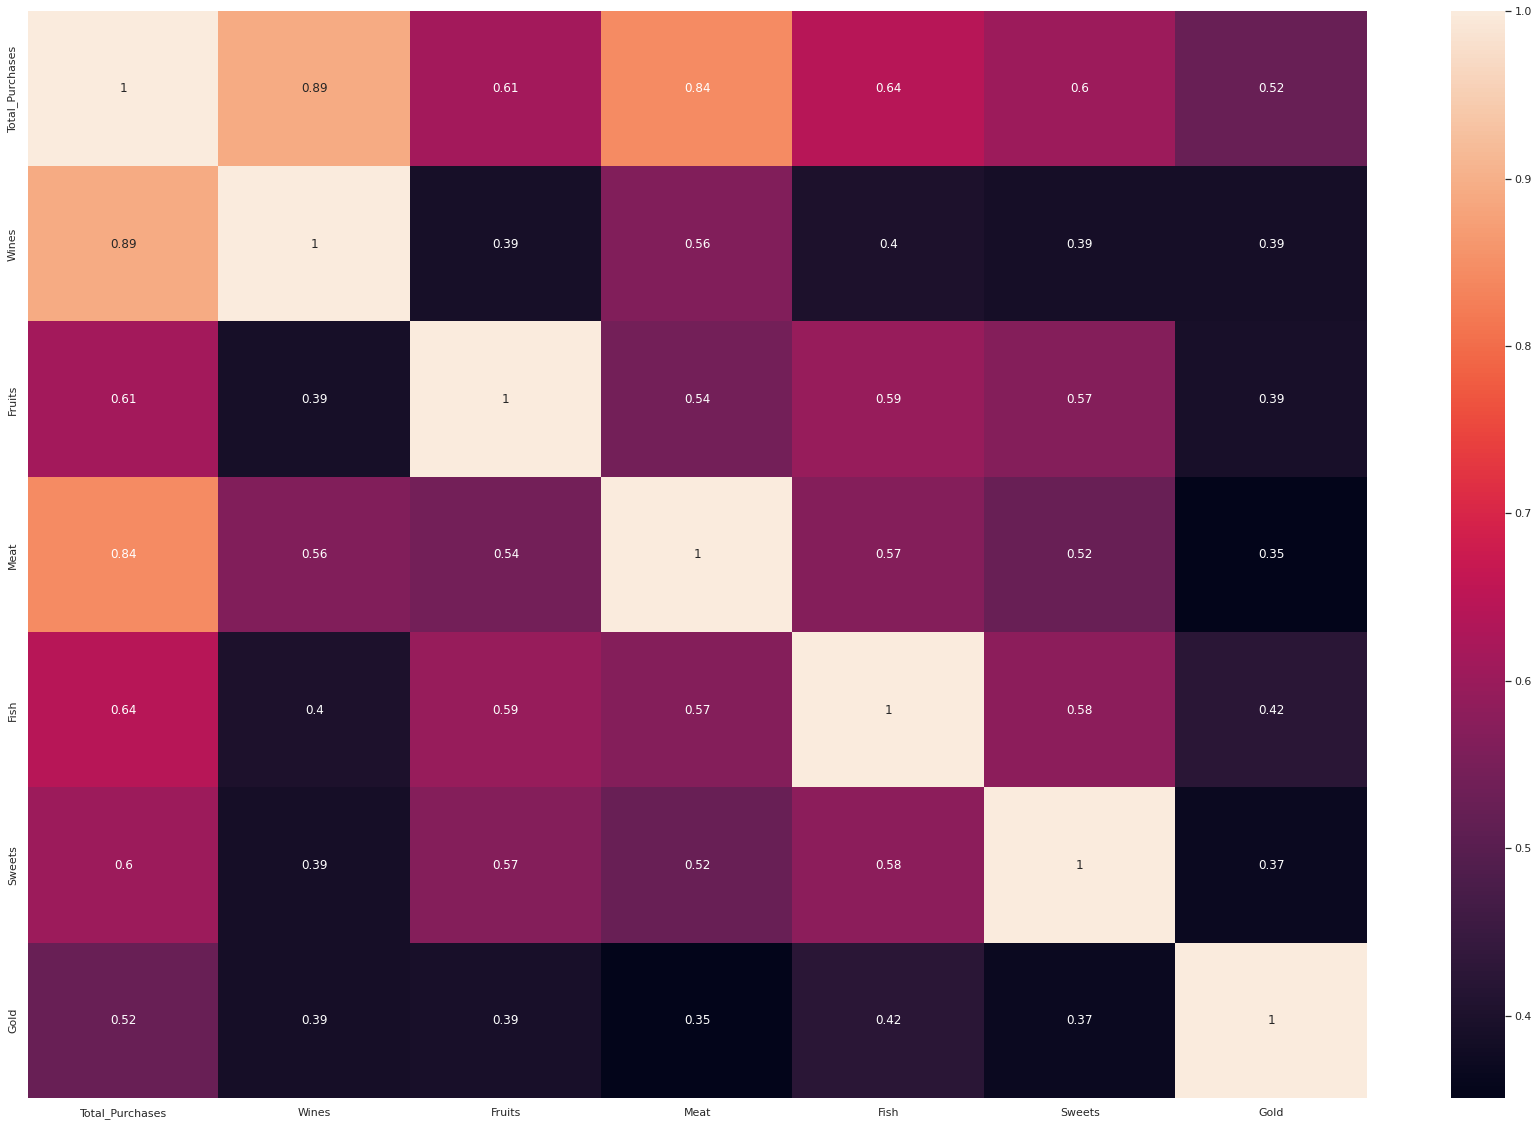

In [ ]:
data = df[["Total_Purchases","Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]]
sn.set(font_scale=2)
fig = plt.figure(figsize=(30,20))
sn.set(style = "whitegrid")
correlation = data.corr()
sn.heatmap(correlation, annot=True)

In [ ]:
df = df.drop(["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"], axis=1)

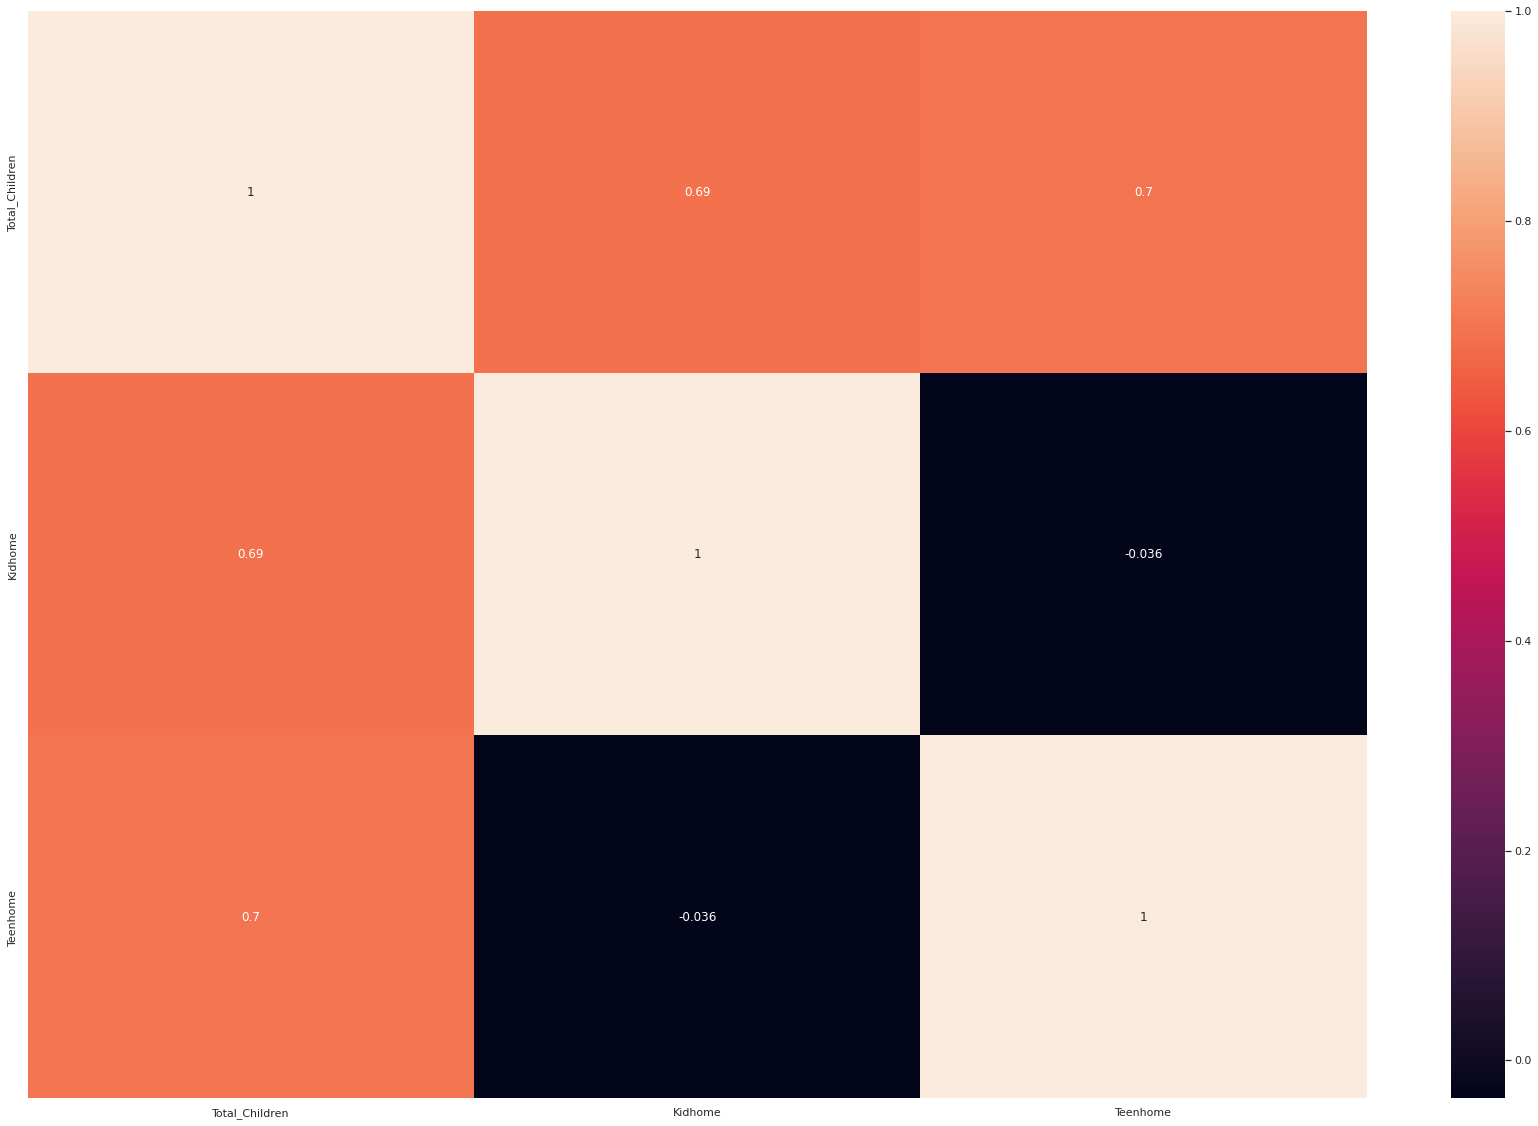

In [ ]:
data = df[["Total_Children","Kidhome", "Teenhome"]]
fig = plt.figure(figsize=(30,20))
sn.set(font_scale=1.25)
sn.set(style = "whitegrid")
correlation = data.corr()
sn.heatmap(correlation, annot=True)

In [ ]:
df = df.drop(["Kidhome", "Teenhome"], axis=1)


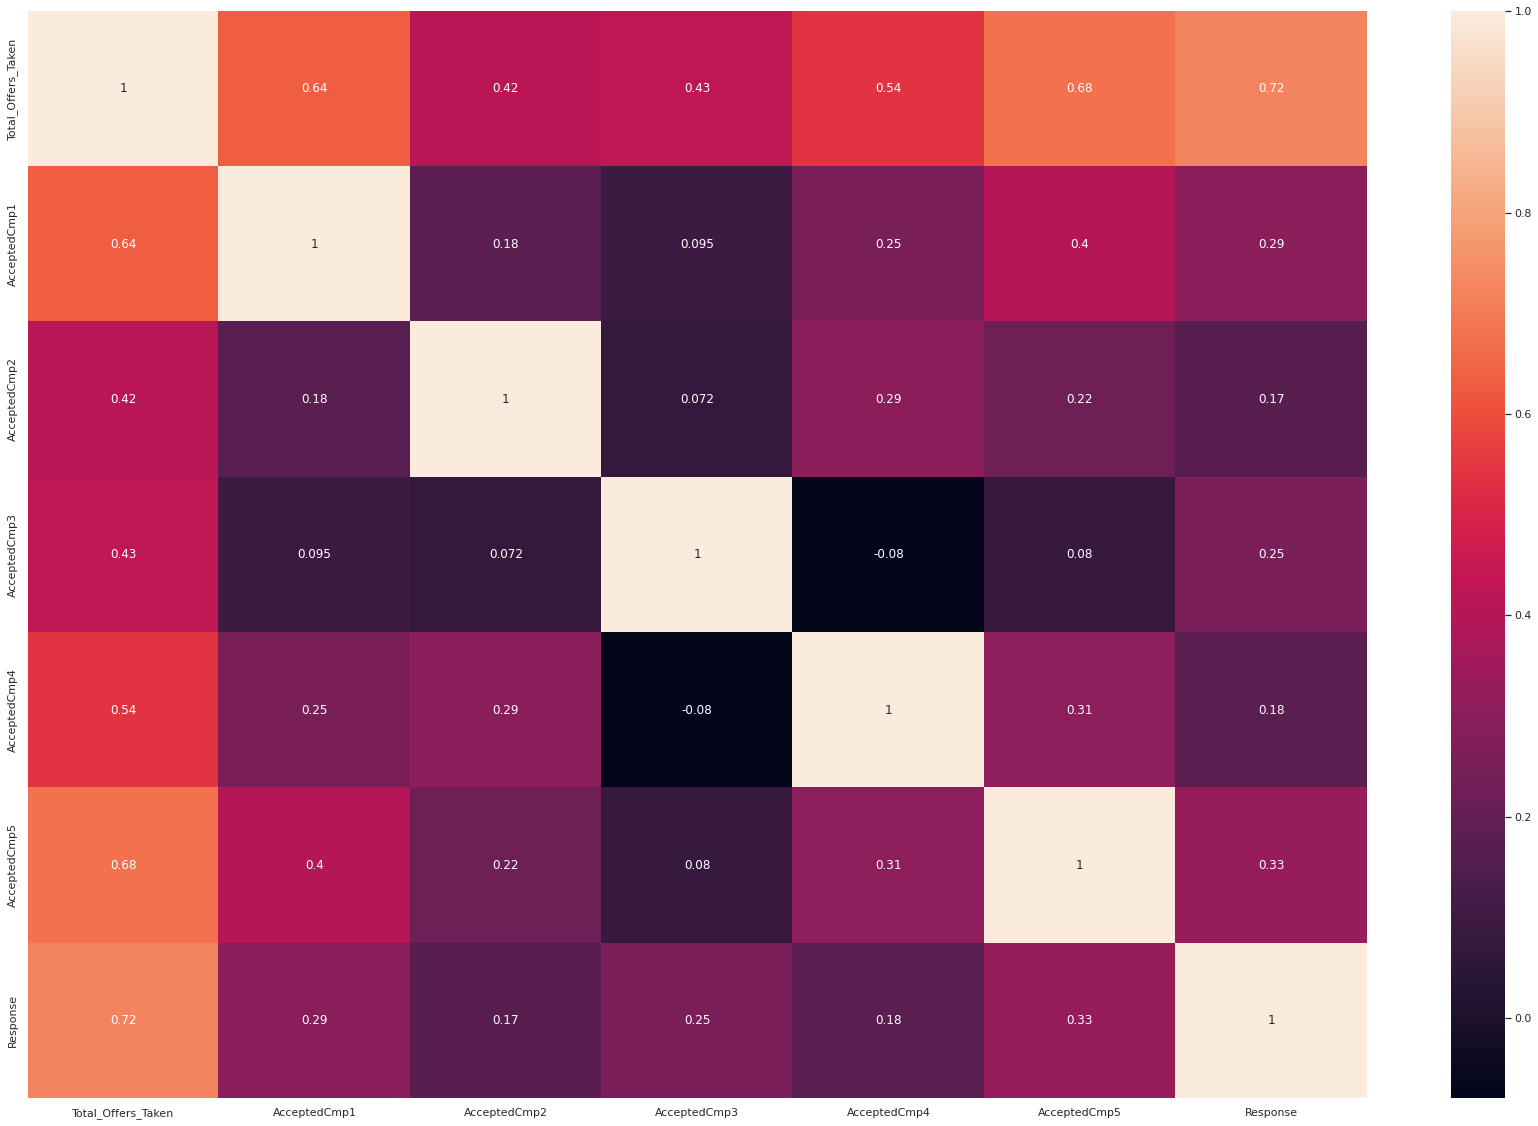

In [ ]:
data = df[["Total_Offers_Taken","AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]]
sn.set(font_scale=2)
fig = plt.figure(figsize=(30,20))
sn.set(style = "whitegrid")
correlation = data.corr()
sn.heatmap(correlation, annot=True)

In [ ]:
df = df.drop(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], axis=1)

In [ ]:
! pip install category_encoders
import category_encoders as ce
encoder= ce.BinaryEncoder(cols='Education',return_df=True)
df=encoder.fit_transform(df)
encoder= ce.BinaryEncoder(cols='Marital_Status',return_df=True)
df=encoder.fit_transform(df)
df

,Education_0,Education_1,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Purchases,Total_Children,Total_Offers_Taken
0,0,1,0,0,0,1,58138.0,58,3,8,10,4,7,0,65,1617,0,0.166667
1,0,1,0,0,0,1,46344.0,38,2,1,1,2,5,0,68,27,2,0.000000
2,0,1,0,0,1,0,71613.0,26,1,8,2,10,4,0,57,776,0,0.000000
3,0,1,0,0,1,0,26646.0,26,2,2,0,4,6,0,38,53,1,0.000000
4,1,0,0,0,1,1,58293.0,94,5,5,3,6,5,0,41,422,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,1,1,61223.0,46,2,9,3,4,5,0,55,1341,1,0.000000
2236,1,0,0,0,1,0,64014.0,56,7,8,2,5,7,0,76,444,3,0.166667
2237,0,1,0,1,0,0,56981.0,91,1,2,3,13,6,0,41,1241,0,0.166667
2238,1,0,0,0,1,0,69245.0,8,2,6,5,10,3,0,66,843,1,0.000000


In [ ]:
numeric_feats = df.select_dtypes(include='number')
numeric_feats

,Education_0,Education_1,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Purchases,Total_Children,Total_Offers_Taken
0,0,1,0,0,0,1,58138.0,58,3,8,10,4,7,0,65,1617,0,0.166667
1,0,1,0,0,0,1,46344.0,38,2,1,1,2,5,0,68,27,2,0.000000
2,0,1,0,0,1,0,71613.0,26,1,8,2,10,4,0,57,776,0,0.000000
3,0,1,0,0,1,0,26646.0,26,2,2,0,4,6,0,38,53,1,0.000000
4,1,0,0,0,1,1,58293.0,94,5,5,3,6,5,0,41,422,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,1,1,61223.0,46,2,9,3,4,5,0,55,1341,1,0.000000
2236,1,0,0,0,1,0,64014.0,56,7,8,2,5,7,0,76,444,3,0.166667
2237,0,1,0,1,0,0,56981.0,91,1,2,3,13,6,0,41,1241,0,0.166667
2238,1,0,0,0,1,0,69245.0,8,2,6,5,10,3,0,66,843,1,0.000000


# Dimensionality Reduction using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scaling
scaler = StandardScaler()
scaler.fit(numeric_feats)
data_scaled = pd.DataFrame(scaler.transform(numeric_feats),columns= numeric_feats.columns )

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(data_scaled)
PCA_ds = pd.DataFrame(pca.transform(data_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,2.349311e-17,2.021098,-5.489937,-1.822080,-0.438737,1.675650,8.081347
col2,2240.0,1.115179e-16,1.410202,-2.183985,-1.352237,-0.571306,1.399656,3.529944
col3,2240.0,-1.490004e-17,1.290044,-2.693335,-0.950985,-0.229815,0.763105,5.495505


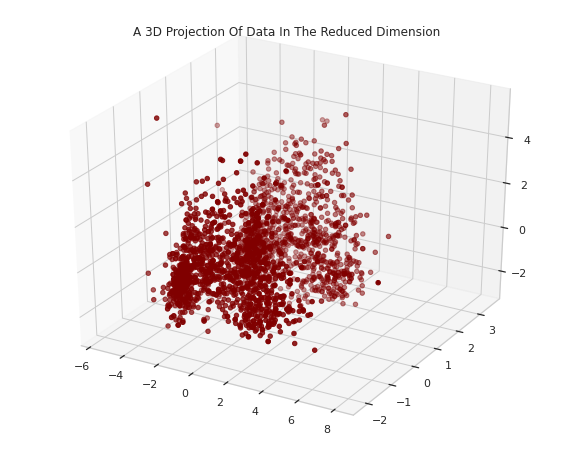

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show() 

# Clustering

Take copies of the dataset

Our datasets:

* PCA_ds
* data_scaled
* numeric_feats

## The Elbow Method
The Elbow Method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters

Source: https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml

The Elbow Method, iterates n times (defined by the user). In each iteration it runs Kmeans with k clusters (equals to the current value of n) and calculates the cost function (either distortion or inertia).




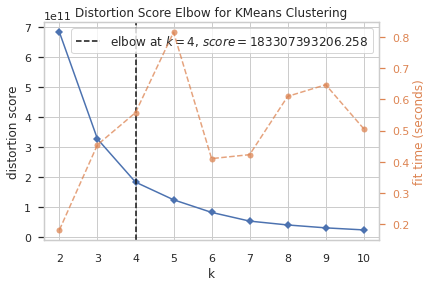

In [ ]:
#Elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()

visualizer = KElbowVisualizer(km, k=10)

visualizer.fit(numeric_feats)
visualizer.show()

## 1- Hierarchical Clustering

Hierarchical clustering is an unsupervised learning algorithm that is used to group together the unlabeled data points having similar characteristics. Hierarchical clustering algorithms falls into following two categories −

Agglomerative hierarchical algorithms − In agglomerative hierarchical algorithms, each data point is treated as a single cluster and then successively merge or agglomerate (bottom-up approach) the pairs of clusters. The hierarchy of the clusters is represented as a dendrogram or tree structure.

Divisive hierarchical algorithms − On the other hand, in divisive hierarchical algorithms, all the data points are treated as one big cluster and the process of clustering involves dividing (Top-down approach) the one big cluster into various small clusters.

### Steps to Perform Agglomerative Hierarchical Clustering

We are going to explain the most used and important Hierarchical clustering i.e. agglomerative. The steps to perform the same is as follows −

  * Step 1 − Treat each data point as single cluster. Hence, we will be having, say K clusters at start. The number of data points will also be K at start.

  * Step 2 − Now, in this step we need to form a big cluster by joining two closet datapoints. This will result in total of K-1 clusters.

  * Step 3 − Now, to form more clusters we need to join two closet clusters. This will result in total of K-2 clusters.

  * Step 4 − Now, to form one big cluster repeat the above three steps until K would become 0 i.e. no more data points left to join.

  * Step 5 − At last, after making one single big cluster, dendrograms will be used to divide into multiple clusters depending upon the problem.

### Role of Dendrograms in Agglomerative Hierarchical Clustering

As we discussed in the last step, the role of dendrogram starts once the big cluster is formed. Dendrogram will be used to split the clusters into multiple clusters of related data points depending upon our problem.

Source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#h2_9

Source: https://www.tutorialspoint.com/machine_learning_with_python/clustering_algorithms_hierarchical_clustering.htm

data

In [ ]:
data_scaled_copy = data_scaled.copy()

In [ ]:
type(data_scaled_copy)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.preprocessing import normalize
data_scaled_copy = normalize(data_scaled_copy)

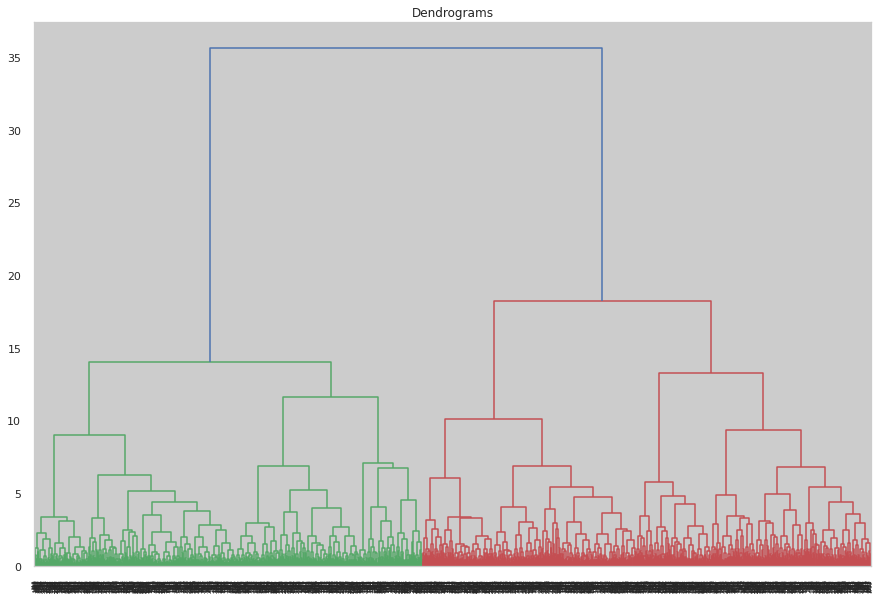

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_copy, method='ward'))

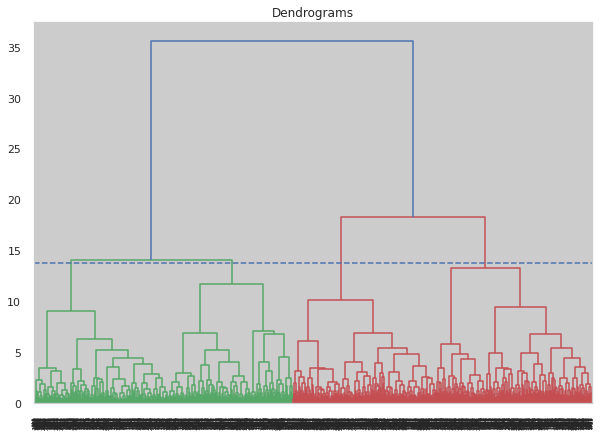

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled_copy, method='ward'))
plt.axhline(y=13.75, color='b', linestyle='--')

### Agglomerative

> Indented block



#### Normal Numeric Features

In [ ]:
numeric_feats_copy = numeric_feats.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
label = cluster.fit_predict(numeric_feats_copy)
label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score = silhouette_score(numeric_feats_copy, label, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.481


#### PCA Applied

In [ ]:
PCA_ds_copy = PCA_ds.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
label = cluster.fit_predict(PCA_ds_copy)
label

array([2, 1, 0, ..., 2, 0, 3])

In [ ]:
score = silhouette_score(PCA_ds_copy, label, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.341


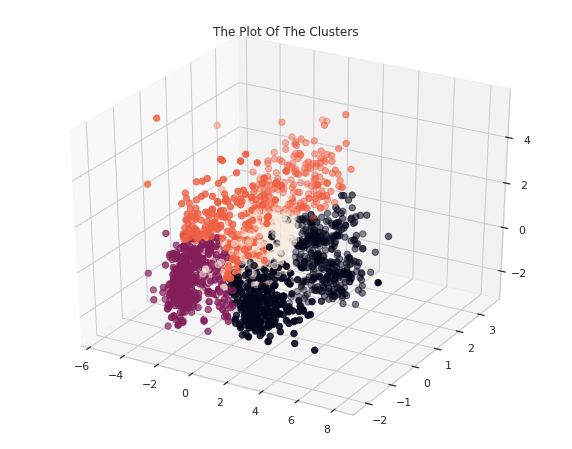

In [ ]:
PCA_ds_copy["Label"] = label

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_copy["Label"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

#### Data Scaled

In [ ]:
data_scaled_copy = data_scaled.copy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
x= cluster.fit_predict(data_scaled_copy)
x

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
score = silhouette_score(data_scaled_copy, x, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.219


## 2- Distance from Centroid (Partitioning)


### K-Means

Only works with numeric values
Do not work with NANs

Data Science Full Course - Learn Data Science in 10 Hours | Data Science For Beginners | Edureka

https://www.youtube.com/watch?v=-ETQ97mXXF0

We Chose the number of clusters to be 4 based on the Elbow Method result above

In [ ]:
PCA_ds_copy= PCA_ds.copy()

In [ ]:
k_elbow = 4
kmeans = KMeans(n_clusters=k_elbow)

In [ ]:
kmeans.fit(PCA_ds_copy)

KMeans(n_clusters=4)

In [ ]:
kmeans.cluster_centers_

array([[-1.638173  , -1.25698537,  0.14371453],
       [ 2.10949445,  1.41984388, -0.22411617],
       [-1.42897439,  1.44789358, -0.25237965],
       [ 2.02747605, -1.34990381,  0.3144833 ]])

In [ ]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[3 0 3 ... 3 1 2]
2240


In [ ]:
PCA_ds_copy['cluster'] = kmeans.labels_

In [ ]:
PCA_ds_copy.head(2)

,col1,col2,col3,cluster
0,2.406639,-1.265273,1.017977,3
1,-1.857153,-1.163222,0.400017,0


### Silhouette Score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. In order to calculate the Silhouette score for each observation / data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called as mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called as mean nearest-cluster distance. The mean distance is denoted by b.
Silhouette score, S, for each sample is calculated using the following formula:

𝑆 = (𝑏–𝑎)/𝑚𝑎𝑥(𝑎,𝑏)

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

Source: https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(PCA_ds_copy, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.487


In [ ]:
PCA_ds_copy

,col1,col2,col3,cluster
0,2.406639,-1.265273,1.017977,3
1,-1.857153,-1.163222,0.400017,0
2,1.683938,-1.276146,0.076737,3
3,-1.944153,-1.498561,-0.529389,0
4,-0.178711,1.274924,-0.365591,2
...,...,...,...,...
2235,0.917802,-1.307133,0.200730,3
2236,-0.655978,2.388310,2.700929,2
2237,1.683919,-1.455703,1.383869,3
2238,1.719820,1.717109,0.012186,1


In [1]:
x =PCA_ds_copy["col1"]
y =PCA_ds_copy["col2"]
z =PCA_ds_copy["col3"]
# PCA_ds_copy["Label"] = kmeans.labels_

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_copy["cluster"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

SyntaxError: ignored

In [ ]:
# importing necessary libraries

!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df

,Education_0,Education_1,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Purchases,Total_Children,Total_Offers_Taken
0,0,1,0,0,0,1,58138.0,58,3,8,10,4,7,0,65,1617,0,0.166667
1,0,1,0,0,0,1,46344.0,38,2,1,1,2,5,0,68,27,2,0.000000
2,0,1,0,0,1,0,71613.0,26,1,8,2,10,4,0,57,776,0,0.000000
3,0,1,0,0,1,0,26646.0,26,2,2,0,4,6,0,38,53,1,0.000000
4,1,0,0,0,1,1,58293.0,94,5,5,3,6,5,0,41,422,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,1,1,61223.0,46,2,9,3,4,5,0,55,1341,1,0.000000
2236,1,0,0,0,1,0,64014.0,56,7,8,2,5,7,0,76,444,3,0.166667
2237,0,1,0,1,0,0,56981.0,91,1,2,3,13,6,0,41,1241,0,0.166667
2238,1,0,0,0,1,0,69245.0,8,2,6,5,10,3,0,66,843,1,0.000000


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 21410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 21410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 21410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 21410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 21410.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 411, cost: 20150.0
Run 1, iteration: 2/100, moves: 10, cost: 20150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 671, cost: 20096.0
Run 2, iteration: 2/1

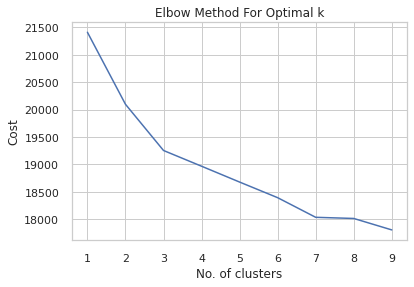

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
labels = kmode.fit_predict(df_copy)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 673, cost: 19385.0
Run 1, iteration: 2/100, moves: 178, cost: 19383.0
Run 1, iteration: 3/100, moves: 2, cost: 19383.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 540, cost: 19387.0
Run 2, iteration: 2/100, moves: 413, cost: 19387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 244, cost: 19842.0
Run 3, iteration: 2/100, moves: 44, cost: 19842.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 772, cost: 19425.0
Run 4, iteration: 2/100, moves: 279, cost: 19386.0
Run 4, iteration: 3/100, moves: 13, cost: 19386.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 831, cost: 19247.0
Run 5, iteration: 2/100, moves: 251, cost: 

In [ ]:
labels

array([2, 1, 2, ..., 1, 1, 0], dtype=uint16)

In [ ]:
score = silhouette_score(PCA_ds_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.030


### Mean Shift

https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html

In [ ]:
PCA_ds_copy = PCA_ds.copy()

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(PCA_ds_copy, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(PCA_ds_copy)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [ ]:
score = silhouette_score(PCA_ds_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.366


In [ ]:
numeric_feats_copy = numeric_feats.copy()

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(numeric_feats_copy, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(numeric_feats_copy)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


In [ ]:
score = silhouette_score(numeric_feats_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.454


In [ ]:
data_scaled_copy = data_scaled.copy()

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data_scaled_copy, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data_scaled_copy)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9


In [ ]:
score = silhouette_score(data_scaled_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.227


## 3- Density of Data

### DBSCAN

DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions. 

DBSCAN needs two parameters:

  * Minimum samples (“MinPts”): the fewest number of points required to form a cluster
  * ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

#### Minimum # of Points estimation

#### ε Epsilon value estimation Using K-Distance graph

Value of K for the KNN is set to 24 = 2*dimension of the DS

In [ ]:
numeric_feats_copy = numeric_feats.copy()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=24)
neighbors_fit = neighbors.fit(numeric_feats_copy)
distances, indices = neighbors_fit.kneighbors(numeric_feats_copy)

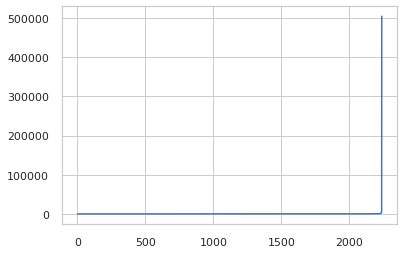

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

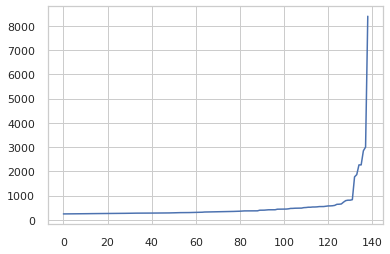

In [ ]:

plt.plot(distances[2100:2239])

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2050, min_samples = 24).fit(numeric_feats_copy) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
score = silhouette_score(numeric_feats_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.617


## 4- Fuzzy

In [ ]:
!pip install fuzzy-c-means

In [ ]:
numeric_feats_copy = numeric_feats.copy()

In [ ]:
import numpy as np
from fcmeans import FCM
numpy_array = numeric_feats_copy.to_numpy()
model = FCM(n_clusters=5) 
model.fit(numpy_array) ## X, numpy array. rows:samples columns:features

In [ ]:
centers = model.centers
labels = model.predict(numpy_array)

In [ ]:
centers

array([[6.82399441e+04, 4.84625590e+01, 2.21821949e+00, 5.68427503e+00,
        4.51681689e+00, 8.48436396e+00, 3.99872457e+00, 7.54397680e-03,
        5.53058467e+01, 1.07351109e+03, 6.84049098e-01, 7.20333391e-02],
       [8.33931621e+04, 4.99944546e+01, 1.13634870e+00, 5.16351965e+00,
        6.15057905e+00, 8.40364537e+00, 2.54451564e+00, 7.70785484e-03,
        5.44301516e+01, 1.46972156e+03, 2.35479405e-01, 2.26937778e-01],
       [3.73072461e+04, 4.84720576e+01, 2.39102598e+00, 2.63976018e+00,
        7.33177884e-01, 3.52331567e+00, 6.59659583e+00, 2.00476356e-02,
        5.11962104e+01, 1.45870556e+02, 1.31501601e+00, 3.98380124e-02],
       [2.13780150e+04, 4.98922309e+01, 2.03631409e+00, 1.92829690e+00,
        4.49946746e-01, 2.85414511e+00, 7.05436523e+00, 1.22792502e-02,
        4.68850704e+01, 6.90600975e+01, 9.35146723e-01, 3.04256678e-02],
       [5.29678889e+04, 5.01845775e+01, 3.22529877e+00, 4.84612514e+00,
        2.28312583e+00, 6.09838944e+00, 5.68515372e+00, 4.48

In [ ]:
labels

array([4, 4, 0, ..., 4, 0, 4])

In [ ]:
score = silhouette_score(numeric_feats_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.514


## 5- Distribution Models

In [ ]:
PCA_ds_copy = PCA_ds.copy()

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(PCA_ds_copy)
#predictions from gmm
labels = gmm.predict(PCA_ds_copy)
labels


array([2, 3, 2, ..., 2, 1, 1])

In [ ]:
score = silhouette_score(PCA_ds_copy, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.254


# 6- References

* https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/?ref=lbp
* https://www.kaggle.com/code/inyeongkang/customer-personality-clustering\
* https://www.kaggle.com/code/przemyslawniedziela/pca-and-kmeans-clustering
* https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering
* https://towardsdatascience.com/fuzzy-c-means-clustering-with-python-f4908c714081
* https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#h2_9
* https://towardsdatascience.com/clustering-concepts-algorithms-and-applications-f512a949549a
* https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity
* https://developers.google.com/machine-learning/clustering
* https://www.seniorcare2share.com/what-is-a-good-silhouette-score/
* https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
* https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#h2_9
* https://www.tutorialspoint.com/machine_learning_with_python/clustering_algorithms_hierarchical_clustering.htm
* https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
* https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
* https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/
* https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
* https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#h2_11